# Profitable App Profiles for the App Store and Google Play Markets

![Image of phone app](https://dwkujuq9vpuly.cloudfront.net/news/wp-content/uploads/2018/09/Mobile-apps_Lead-960x480.jpg)

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

The ever-changing mobile landscape is a challenging space to navigate. The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

In [4]:
#import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#import csv using pandas pd.read_csv function

google_df = pd.read_csv("googleplaystore.csv")
apple_df = pd.read_csv("AppleStore.csv")

__Google Dataset:__

Cleaning the google dataset

In [12]:
print("Number of rows in the dataset: " + str(len(google_df)))
print("\n")
print("Number of columns in the dataset: " + str(google_df.shape[1]))

Number of rows in the dataset: 10841


Number of columns in the dataset: 13


In [9]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From the kaggle discussion tab, the row 10472 has some missing data. The row will be removed

In [16]:
google_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [17]:
google_df.drop(10472, axis=0, inplace=True)

In [19]:
#Row 10472 has been removed

google_df.iloc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated               August 7, 2018
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

In [21]:
#Check out Null objects

google_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [22]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We see that the Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

In [23]:
google_df.drop(["Rating","Size","Content Rating","Last Updated","Current Ver","Android Ver"], axis=1, inplace=True)

In [25]:
google_df.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,967,"500,000+",Free,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Art & Design;Creativity


In [41]:
google_df['Price'] = google_df['Price'].apply(lambda x: x.strip("$"))

In [43]:
google_df.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,967,"500,000+",Free,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Art & Design;Creativity


We can find out if there are ny apps that are duplicated in the dataset. We'll find that some apps have more than one entry.

In [53]:
google_df["App"].duplicated().sum()
#There are 1181 apps that are duplicated

1181

In [55]:
google_df[google_df["App"] == "Instagram"]

,App,Category,Reviews,Installs,Type,Price,Genres
2545,Instagram,SOCIAL,66577313,"1,000,000,000+",Free,0,Social
2604,Instagram,SOCIAL,66577446,"1,000,000,000+",Free,0,Social
2611,Instagram,SOCIAL,66577313,"1,000,000,000+",Free,0,Social
3909,Instagram,SOCIAL,66509917,"1,000,000,000+",Free,0,Social


We can see one such app that has more than 1 entry. We can delete the duplicates based on the number of reviews. The row for the duplicates has the highest reviews would mean that it is the updated. Taking this association, we can remove duplicate rows

In [59]:
google_df[(google_df["App"] == "Instagram")]["Reviews"].max()

'66577446'

In [60]:
max_reviews = google_df.groupby("App")["Reviews"].transform(max)

In [70]:
max_reviews_df = google_df.loc[google_df["Reviews"] == max_reviews]

In [77]:
#We can see that the duplicates have been removed based on the Reviews column
max_reviews_df[max_reviews_df["App"] == "Instagram"]

,App,Category,Reviews,Installs,Type,Price,Genres
2604,Instagram,SOCIAL,66577446,"1,000,000,000+",Free,0,Social


In [89]:
#There are some other apps that are duplicated with duplicate Review numbers as well. We can keep the first ones using the pd.drop_duplicates function
len(max_reviews_df)

10055

In [94]:
google = max_reviews_df["App"].drop_duplicates(keep="first")

In [97]:
#We can use the len() function to check if the duplicates have been removed
print(len(google))
print("Yes! The duplicates have been removed")

9659
Yes! The duplicates have been removed


In [169]:
max_reviews_df.drop_duplicates(keep="first",inplace=True)

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
max_reviews_df[max_reviews_df["App"].duplicated()]

,App,Category,Reviews,Installs,Type,Price,Genres
2015,Candy Bomb,FAMILY,42145,"10,000,000+",Free,0,Casual;Brain Games
3999,Learn C++,FAMILY,73404,"1,000,000+",Free,0,Education
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,21,"1,000+",Paid,5.99,Education;Education
4805,YouTube Gaming,FAMILY,130549,"5,000,000+",Free,0,Entertainment


In [175]:
max_reviews_df[max_reviews_df["App"] == "Candy Bomb"]

,App,Category,Reviews,Installs,Type,Price,Genres
1980,Candy Bomb,GAME,42145,"10,000,000+",Free,0,Casual;Brain Games
2015,Candy Bomb,FAMILY,42145,"10,000,000+",Free,0,Casual;Brain Games


In [177]:
max_reviews_df.drop_duplicates(subset="App",keep="first", inplace=True)

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
print(max_reviews_df.head())
print(max_reviews_df.shape)

                                                 App        Category Reviews  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     967   
5                         Paper flowers instructions  ART_AND_DESIGN     167   

      Installs  Type Price                   Genres  
0      10,000+  Free     0             Art & Design  
2   5,000,000+  Free     0             Art & Design  
3  50,000,000+  Free     0             Art & Design  
4     100,000+  Free     0  Art & Design;Creativity  
5      50,000+  Free     0             Art & Design  
(9659, 7)


If you explore the data sets enough, you'll notice the names of some of the apps suggest they are not directed toward an English-speaking audience. Below, we see a couple of examples from both data sets:

In [203]:
apple_df.iloc[814]

Unnamed: 0                        926
id                          436957087
track_name          搜狐新闻—新闻热点资讯掌上阅读软件
size_bytes                  136421376
currency                          USD
price                               0
rating_count_tot                  383
rating_count_ver                    0
user_rating                       4.5
user_rating_ver                     0
ver                             5.8.9
cont_rating                       17+
prime_genre                      News
sup_devices.num                    38
ipadSc_urls.num                     0
lang.num                            1
vpp_lic                             1
Name: 814, dtype: object

We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

In [279]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

In [284]:
google_english = max_reviews_df[max_reviews_df["App"].apply(is_english)]

In [286]:
google_english.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,167,"50,000+",Free,0,Art & Design


In [291]:
#Number of rows after cleaning the dataset

print("Number of rows in the dataset: " + str(len(google_english)))

Number of rows in the dataset: 9614


__Apple Dataset:__

Cleaning the apple data set

In [289]:
apple_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [294]:
print("Number of rows in the dataset: " + str(len(apple_df)))
print("\n")
print("Number of columns in the dataset: " + str(apple_df.shape[1]))

Number of rows in the dataset: 7197


Number of columns in the dataset: 17


In [295]:
#Remove columns from the dataset which we do not want for analysis

apple_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


We have 7197 iOS apps in this data set, and the columns that seem interesting are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. 

In [298]:
apple_df = apple_df[["track_name","currency","price","rating_count_tot","rating_count_ver","prime_genre","user_rating","user_rating_ver","ver"]]

In [299]:
apple_df.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
0,PAC-MAN Premium,USD,3.99,21292,26,Games,4.0,4.5,6.3.5
1,Evernote - stay organized,USD,0.00,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.00,985920,5320,Reference,4.5,5.0,7.5.1


In [302]:
#Check for null values

apple_df.isnull().sum()
#There are no null values

track_name          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
prime_genre         0
user_rating         0
user_rating_ver     0
ver                 0
dtype: int64

In [310]:
#Check for duplicate values

apple_df.duplicated().sum()

0

In [313]:
#Remove non-english apps using the function used for the google dataset

apple_english = apple_df[apple_df["track_name"].apply(is_english)]

In [314]:
apple_english.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
0,PAC-MAN Premium,USD,3.99,21292,26,Games,4.0,4.5,6.3.5
1,Evernote - stay organized,USD,0.00,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.00,985920,5320,Reference,4.5,5.0,7.5.1


In [315]:
print("Number of rows in the dataset: " + str(len(apple_english)))
print("\n")
print("Number of columns in the dataset: " + str(apple_english.shape[1]))

Number of rows in the dataset: 6183


Number of columns in the dataset: 9


__Isolating the Free Apps__

Isolating the free apps will be our last step in the data cleaning process. On the next screen, we're going to start analyzing the data.

In [316]:
google_english.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,167,"50,000+",Free,0,Art & Design


In [319]:
google_free = google_english[google_english["Price"] == "0"]

In [324]:
apple_english.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
0,PAC-MAN Premium,USD,3.99,21292,26,Games,4.0,4.5,6.3.5
1,Evernote - stay organized,USD,0.00,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.00,985920,5320,Reference,4.5,5.0,7.5.1


In [327]:
apple_free = apple_english[apple_english["price"] == 0.0]

In [328]:
print(len(google_free))
print(len(apple_free))

8862
3222


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

__Most Common Genres__

our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market

In [346]:
#Lets take a look at the apple dataset first

apple_free.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
1,Evernote - stay organized,USD,0.0,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.0,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.0,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.0,985920,5320,Reference,4.5,5.0,7.5.1
6,PayPal - Send and request money safely,USD,0.0,119487,879,Finance,4.0,4.5,6.12.0


In [360]:
apple_genre_freq_table = apple_free["prime_genre"].value_counts(normalize=True)*100

In [361]:
apple_genre_freq_table

Games                58.162632
Entertainment         7.883302
Photo & Video         4.965860
Education             3.662322
Social Networking     3.289882
Shopping              2.607076
Utilities             2.513966
Sports                2.141527
Music                 2.048417
Health & Fitness      2.017381
Productivity          1.738051
Lifestyle             1.582868
News                  1.334575
Travel                1.241465
Finance               1.117318
Weather               0.869025
Food & Drink          0.806952
Reference             0.558659
Business              0.527623
Book                  0.434513
Navigation            0.186220
Medical               0.186220
Catalogs              0.124146
Name: prime_genre, dtype: float64

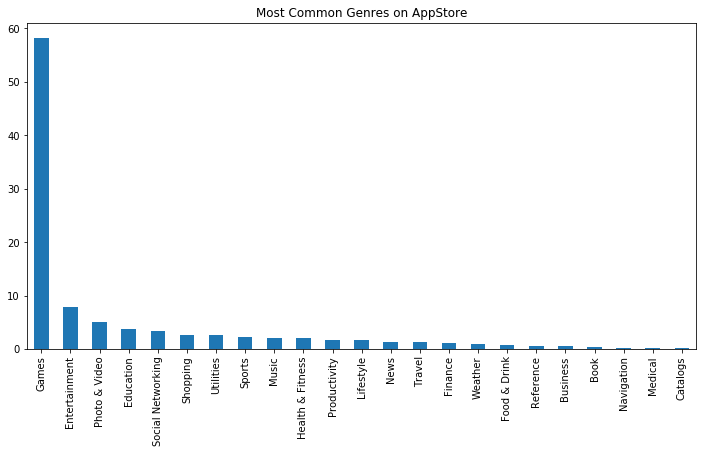

In [370]:
apple_genre_freq_table.plot(kind="bar", figsize=(12,6), title="Most Common Genres on AppStore")

We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

In [375]:
google_cat_freq = google_free["Category"].value_counts(normalize=True)*100

In [381]:
google_cat_freq

FAMILY                 18.934778
GAME                    9.693072
TOOLS                   8.451817
BUSINESS                4.592643
LIFESTYLE               3.904311
PRODUCTIVITY            3.893026
FINANCE                 3.701196
MEDICAL                 3.520650
SPORTS                  3.396524
PERSONALIZATION         3.317536
COMMUNICATION           3.238547
HEALTH_AND_FITNESS      3.080569
PHOTOGRAPHY             2.945159
NEWS_AND_MAGAZINES      2.798465
SOCIAL                  2.663056
TRAVEL_AND_LOCAL        2.335816
SHOPPING                2.245543
BOOKS_AND_REFERENCE     2.143986
DATING                  1.861882
VIDEO_PLAYERS           1.794177
MAPS_AND_NAVIGATION     1.399233
FOOD_AND_DRINK          1.241255
EDUCATION               1.173550
ENTERTAINMENT           0.959151
LIBRARIES_AND_DEMO      0.936583
AUTO_AND_VEHICLES       0.925299
HOUSE_AND_HOME          0.823742
WEATHER                 0.801174
EVENTS                  0.710900
PARENTING               0.654480
ART_AND_DE

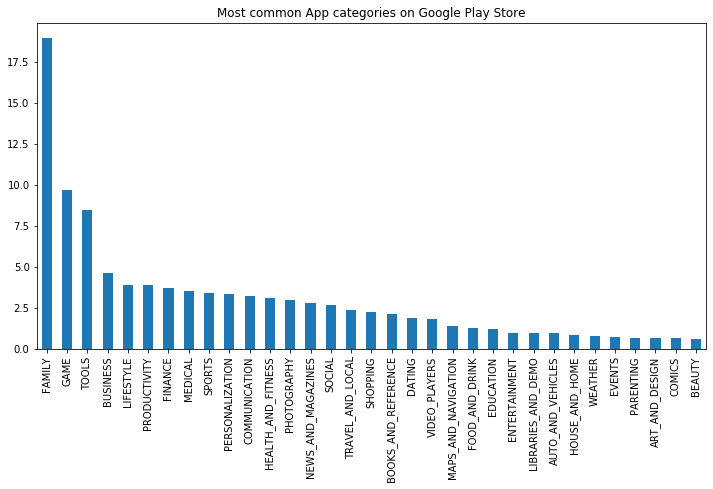

In [380]:
google_cat_freq.plot(kind="bar", figsize=(12,6), title="Most common App categories on Google Play Store")

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [382]:
google_free.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,"10,000+",Free,0,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,"100,000+",Free,0,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,167,"50,000+",Free,0,Art & Design


In [385]:
google_free["Genres"].value_counts(normalize=True)*100

Tools                                    8.440533
Entertainment                            6.070864
Education                                5.348680
Business                                 4.592643
Productivity                             3.893026
Lifestyle                                3.893026
Finance                                  3.701196
Medical                                  3.520650
Sports                                   3.464229
Personalization                          3.317536
Communication                            3.238547
Action                                   3.103137
Health & Fitness                         3.080569
Photography                              2.945159
News & Magazines                         2.798465
Social                                   2.663056
Travel & Local                           2.324532
Shopping                                 2.245543
Books & Reference                        2.143986
Simulation                               2.042428


The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

__Most Popular Apps by Genre on the App Store__

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

In [402]:
apple_free.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
1,Evernote - stay organized,USD,0.0,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.0,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.0,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.0,985920,5320,Reference,4.5,5.0,7.5.1
6,PayPal - Send and request money safely,USD,0.0,119487,879,Finance,4.0,4.5,6.12.0


In [416]:
apple_free.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False)

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Shopping             26919.690476
Health & Fitness     23298.015385
Sports               23008.898551
Games                22788.669691
News                 21248.023256
Productivity         21028.410714
Utilities            18684.456790
Lifestyle            16485.764706
Entertainment        14029.830709
Business              7491.117647
Education             7003.983051
Catalogs              4004.000000
Medical                612.000000
Name: rating_count_tot, dtype: float64

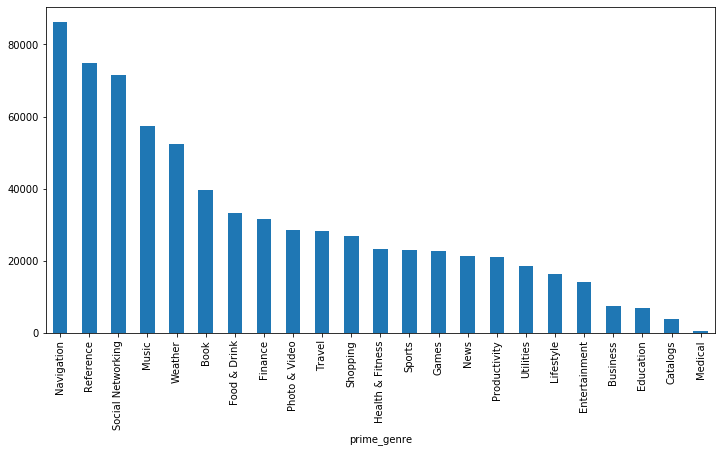

In [419]:
apple_free.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(12,6))

On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [420]:
apple_free.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
1,Evernote - stay organized,USD,0.0,161065,26,Productivity,4.0,3.5,8.2.2
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.0,188583,2822,Weather,3.5,4.5,5.0.0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.0,262241,649,Shopping,4.0,4.5,5.10.0
4,Bible,USD,0.0,985920,5320,Reference,4.5,5.0,7.5.1
6,PayPal - Send and request money safely,USD,0.0,119487,879,Finance,4.0,4.5,6.12.0


In [453]:
apple_nav_genre = apple_free[apple_free["prime_genre"] == "Navigation"]
apple_nav_genre

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
174,"Waze - GPS Navigation, Maps & Real-time Traffic",USD,0.0,345046,3040,Navigation,4.5,4.5,4.24
200,Geocaching®,USD,0.0,12811,134,Navigation,3.5,1.5,5.3
280,ImmobilienScout24: Real Estate Search in Germany,USD,0.0,187,0,Navigation,3.5,0.0,9.5
959,Railway Route Search,USD,0.0,5,0,Navigation,3.0,0.0,3.17.1
1203,CoPilot GPS – Car Navigation & Offline Maps,USD,0.0,3582,70,Navigation,4.0,3.5,10.0.0.984
1693,Google Maps - Navigation & Transit,USD,0.0,154911,1253,Navigation,4.5,4.0,4.31.1


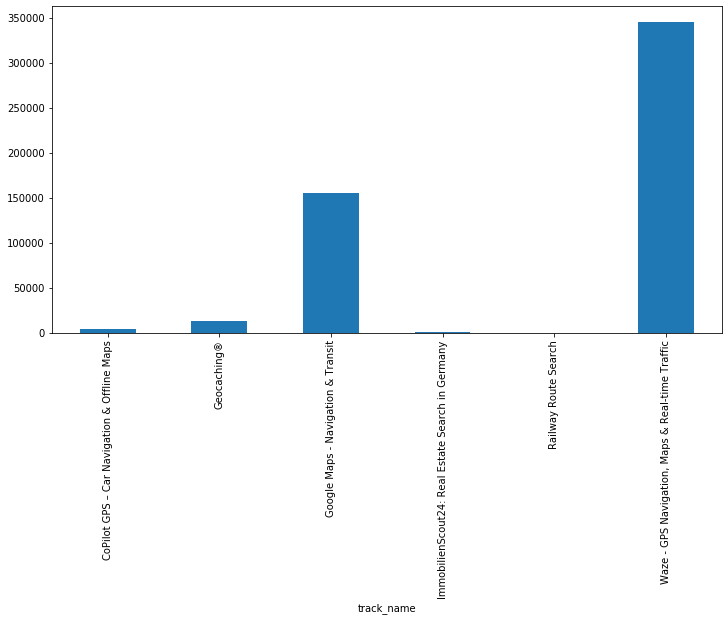

In [456]:
apple_nav_genre.groupby("track_name")["rating_count_tot"].mean().plot(kind="bar", figsize=(12,6))

In [428]:
apple_free[apple_free["prime_genre"] == "Navigation"]["rating_count_tot"].sum()

516542

The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

In [432]:
apple_free[apple_free["prime_genre"] == "Social Networking"].sort_values("rating_count_tot", ascending=False)[:10]

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
16,Facebook,USD,0.0,2974676,212,Social Networking,3.5,3.5,95.0
755,Pinterest,USD,0.0,1061624,1814,Social Networking,4.5,4.0,6.26
91,Skype for iPhone,USD,0.0,373519,127,Social Networking,3.5,4.0,6.35.1
913,Messenger,USD,0.0,351466,892,Social Networking,3.0,3.0,119.0
92,Tumblr,USD,0.0,334293,919,Social Networking,4.0,4.0,8.6
125,WhatsApp Messenger,USD,0.0,287589,73088,Social Networking,4.5,4.5,2.17.22
334,Kik,USD,0.0,260965,228,Social Networking,4.0,3.0,11.21.0
752,"ooVoo – Free Video Call, Text and Voice",USD,0.0,177501,1014,Social Networking,4.5,4.5,3.1.6
142,TextNow - Unlimited Text + Calls,USD,0.0,164963,69,Social Networking,3.5,4.0,8.5.1
477,Viber Messenger – Text & Call,USD,0.0,164249,206,Social Networking,4.5,4.5,6.9.0


In [437]:
apple_social_genre = apple_free[apple_free["prime_genre"] == "Social Networking"].sort_values("rating_count_tot", ascending=False)[:10]

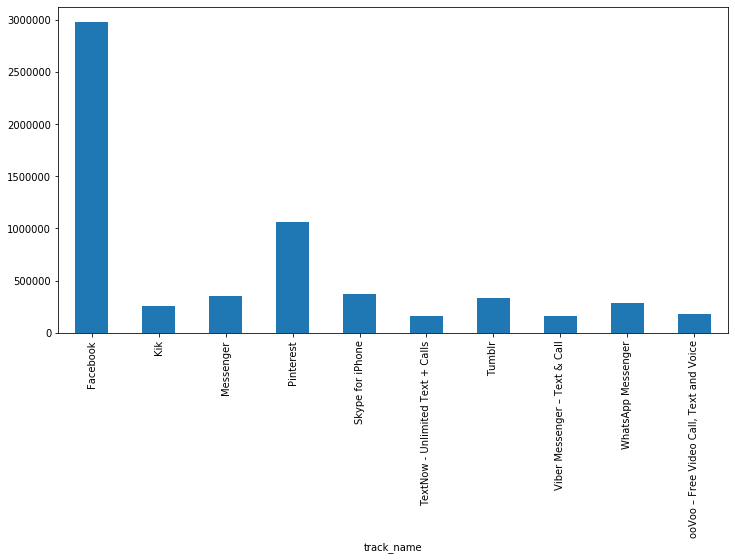

In [449]:
apple_social_genre.groupby("track_name")["rating_count_tot"].mean().plot(kind="bar", figsize=(12,6))

In [458]:
apple_music_genre = apple_free[apple_free["prime_genre"] == "Music"].sort_values("rating_count_tot", ascending=False)[:10]
apple_music_genre

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
7,Pandora - Music & Radio,USD,0.0,1126879,3594,Music,4.0,4.5,8.4.1
178,Spotify Music,USD,0.0,878563,8253,Music,4.5,4.5,8.4.3
18,"Shazam - Discover music, artists, videos & lyrics",USD,0.0,402925,136,Music,4.0,4.5,11.0.3
35,iHeartRadio – Free Music & Radio Stations,USD,0.0,293228,110,Music,4.0,3.0,8.0.0
238,SoundCloud - Music & Audio,USD,0.0,135744,594,Music,4.0,4.5,5.6.0
713,Magic Piano by Smule,USD,0.0,131695,1102,Music,4.5,4.0,8.3.1
1229,Smule Sing!,USD,0.0,119316,33,Music,4.5,4.0,5.2.3
701,TuneIn Radio - MLB NBA Audiobooks Podcasts Music,USD,0.0,110420,370,Music,4.5,4.5,11.9
1236,Amazon Music,USD,0.0,106235,4605,Music,4.5,5.0,6.5.0
329,SoundHound Song Search & Music Player,USD,0.0,82602,13,Music,4.0,4.5,7.6


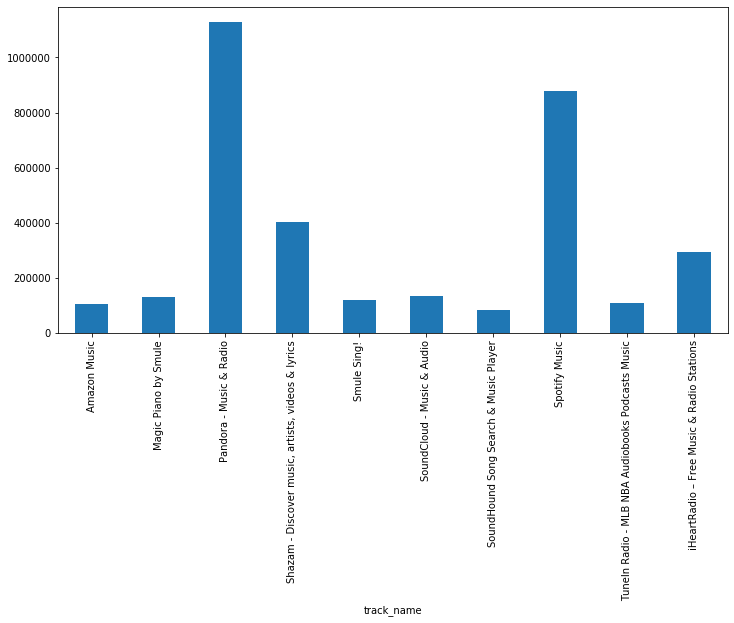

In [461]:
apple_music_genre.groupby("track_name")["rating_count_tot"].mean().plot(kind="bar", figsize=(12,6))

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages,

In [465]:
apple_free[apple_free["prime_genre"] == "Reference"].sort_values("rating_count_tot", ascending=False)[:5]

,track_name,currency,price,rating_count_tot,rating_count_ver,prime_genre,user_rating,user_rating_ver,ver
4,Bible,USD,0.0,985920,5320,Reference,4.5,5.0,7.5.1
116,Dictionary.com Dictionary & Thesaurus,USD,0.0,200047,177,Reference,4.0,4.0,7.1.3
375,Dictionary.com Dictionary & Thesaurus for iPad,USD,0.0,54175,10176,Reference,4.5,4.5,4.0
681,Google Translate,USD,0.0,26786,27,Reference,3.5,4.5,5.10.0
503,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",USD,0.0,18418,706,Reference,4.5,5.0,9.2.1


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

__Most Popular Apps by Genre on Google Play__

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [477]:
google_free["Installs"].value_counts(normalize=True)*100

1,000,000+        15.741368
100,000+          11.554954
10,000,000+       10.516813
10,000+           10.200858
1,000+             8.395396
100+               6.917174
5,000,000+         6.838186
500,000+           5.574362
50,000+            4.773189
5,000+             4.513654
10+                3.543218
500+               3.249831
50,000,000+        2.290679
100,000,000+       2.121417
50+                1.918303
5+                 0.789889
1+                 0.507786
500,000,000+       0.270819
1,000,000,000+     0.225683
0+                 0.045137
0                  0.011284
Name: Installs, dtype: float64

In [479]:
google_free["Installs"] = google_free["Installs"].str.replace(",","").str.replace("+","").str.strip().astype(int)

C:\Users\torsumkhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [480]:
google_free.head()

,App,Category,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,10000,Free,0,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,5000000,Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,50000000,Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,100000,Free,0,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,167,50000,Free,0,Art & Design


In [488]:
pd.options.display.float_format = '{:.3f}'.format
google_free.groupby("Category")["Installs"].mean().sort_values(ascending=False)

Category
COMMUNICATION         38456119.167
VIDEO_PLAYERS         24727872.453
SOCIAL                23253652.127
PHOTOGRAPHY           17805627.644
PRODUCTIVITY          16787331.345
GAME                  15560965.600
TRAVEL_AND_LOCAL      13984077.710
ENTERTAINMENT         11640705.882
TOOLS                 10682301.033
NEWS_AND_MAGAZINES     9549178.468
BOOKS_AND_REFERENCE    8767811.895
SHOPPING               7036877.312
PERSONALIZATION        5201482.612
WEATHER                5074486.197
HEALTH_AND_FITNESS     4188821.985
MAPS_AND_NAVIGATION    4056941.774
FAMILY                 3694276.335
SPORTS                 3638640.143
ART_AND_DESIGN         1986335.088
FOOD_AND_DRINK         1924897.736
EDUCATION              1820673.077
BUSINESS               1712290.147
LIFESTYLE              1437816.269
FINANCE                1387692.476
HOUSE_AND_HOME         1331540.562
DATING                  854028.830
COMICS                  817657.273
AUTO_AND_VEHICLES       647317.817
LIBRARIES_A

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [492]:
google_free[google_free["Category"] == "COMMUNICATION"].sort_values("Installs", ascending=False)[:10]

,App,Category,Reviews,Installs,Type,Price,Genres
336,WhatsApp Messenger,COMMUNICATION,69119316,1000000000,Free,0,Communication
382,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578,1000000000,Free,0,Communication
464,Hangouts,COMMUNICATION,3419513,1000000000,Free,0,Communication
411,Google Chrome: Fast & Secure,COMMUNICATION,9643041,1000000000,Free,0,Communication
391,Skype - free IM & video calls,COMMUNICATION,10484169,1000000000,Free,0,Communication
451,Gmail,COMMUNICATION,4604483,1000000000,Free,0,Communication
403,LINE: Free Calls & Messages,COMMUNICATION,10790289,500000000,Free,0,Communication
4676,Viber Messenger,COMMUNICATION,11335481,500000000,Free,0,Communication
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,17714850,500000000,Free,0,Communication
371,Google Duo - High Quality Video Calls,COMMUNICATION,2083237,500000000,Free,0,Communication


In [496]:
google_free[(google_free["Category"] == "COMMUNICATION") & (google_free["Installs"] < 100000000)].groupby("Category")["Installs"].mean()

Category
COMMUNICATION   3603485.388
Name: Installs, dtype: float64

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [501]:
google_free[google_free["Category"] == "BOOKS_AND_REFERENCE"].sort_values("Installs", ascending=False)[:10]

,App,Category,Reviews,Installs,Type,Price,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,1000000000,Free,0,Books & Reference
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,2915189,100000000,Free,0,Books & Reference
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,568922,100000000,Free,0,Books & Reference
3941,Bible,BOOKS_AND_REFERENCE,2440695,100000000,Free,0,Books & Reference
4083,Amazon Kindle,BOOKS_AND_REFERENCE,814151,100000000,Free,0,Books & Reference
4100,Aldiko Book Reader,BOOKS_AND_REFERENCE,210534,10000000,Free,0,Books & Reference
6296,English Dictionary - Offline,BOOKS_AND_REFERENCE,341234,10000000,Free,0,Books & Reference
9642,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,364452,10000000,Free,0,Books & Reference
9625,JW Library,BOOKS_AND_REFERENCE,922752,10000000,Free,0,Books & Reference
9621,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,454412,10000000,Free,0,Books & Reference


The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average such as the top 5 apps

In [502]:
google_free[google_free["Category"] == "BOOKS_AND_REFERENCE"].sort_values("Installs", ascending=False)[:5]

,App,Category,Reviews,Installs,Type,Price,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,1000000000,Free,0,Books & Reference
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,2915189,100000000,Free,0,Books & Reference
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,568922,100000000,Free,0,Books & Reference
3941,Bible,BOOKS_AND_REFERENCE,2440695,100000000,Free,0,Books & Reference
4083,Amazon Kindle,BOOKS_AND_REFERENCE,814151,100000000,Free,0,Books & Reference


However, this category is still popular and is dominated by audio book apps, trasnlators, Qurans, book processing etc

In [504]:
google_free[google_free["Category"] == "BOOKS_AND_REFERENCE"].sort_values("Installs", ascending=False)[5:]

,App,Category,Reviews,Installs,Type,Price,Genres
4100,Aldiko Book Reader,BOOKS_AND_REFERENCE,210534,10000000,Free,0,Books & Reference
6296,English Dictionary - Offline,BOOKS_AND_REFERENCE,341234,10000000,Free,0,Books & Reference
9642,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,364452,10000000,Free,0,Books & Reference
9625,JW Library,BOOKS_AND_REFERENCE,922752,10000000,Free,0,Books & Reference
9621,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,454412,10000000,Free,0,Books & Reference
9570,Spanish English Translator,BOOKS_AND_REFERENCE,87919,10000000,Free,0,Books & Reference
173,HTC Help,BOOKS_AND_REFERENCE,8342,10000000,Free,0,Books & Reference
9643,English Hindi Dictionary,BOOKS_AND_REFERENCE,384368,10000000,Free,0,Books & Reference
5319,Al-Quran (Free),BOOKS_AND_REFERENCE,218451,10000000,Free,0,Books & Reference
5323,Al Quran Indonesia,BOOKS_AND_REFERENCE,445756,10000000,Free,0,Books & Reference


__Conclusion__

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets. It seems that the books and references apps are most popular in both app store and google play and we can use this data to develop apps using this